In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arabapic/araba.jpeg
/kaggle/input/imajpic/imgfloc.PNG
/kaggle/input/kalempic/kalem.jpg
/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [2]:
# linear algebra
import numpy as np
# data processing, CSV file I / O (e.g. pd.read_csv)
import pandas as pd
import os
import tensorflow as tf
import keras
# linear algebra
import numpy as np
# data processing, CSV file I / O (e.g. pd.read_csv)
import pandas as pd
import os
import tensorflow as tf

import cv2
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore') 

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [5]:
from tensorflow.keras.utils import to_categorical
#because of my output is multiclass classification
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

#normalization:
x_train_normalize = x_train / 255.0
x_test_normalize = x_test / 255.0

In [8]:
# Importing the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
from tensorflow.keras.regularizers import l2

modelv3 = Sequential()

modelv3.add(Input(shape = x_train.shape[1:]))

modelv3.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(MaxPool2D(pool_size=(2, 2)))
modelv3.add(Dropout(0.2))

modelv3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(MaxPool2D(pool_size=(2, 2)))
modelv3.add(Dropout(0.3))

modelv3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(MaxPool2D(pool_size=(2, 2))) #adding normalization as a different from the modelv1
modelv3.add(Dropout(0.4))


#Building Fully Connected Layer (FC Layer)
modelv3.add(Flatten())

modelv3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization())
modelv3.add(Dropout(0.5))

modelv3.add(Dense(10, activation='softmax'))

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         verbose=1,
                                         patience=5,
                                         restore_best_weights=True)

opt = keras.optimizers.Adam(learning_rate=0.003)
modelv3.compile(loss='categorical_crossentropy', optimizer=opt , metrics=['accuracy'])
modelv3.summary()
historyv3 = modelv3.fit(x_train,y_train_cat,epochs=50, batch_size = 32, validation_data=(x_test,y_test_cat), verbose=1,callbacks= [callback]) 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             

 Total params: 599,434 (2.29 MB)

 Trainable params: 598,090 (2.28 MB)

 Non-trainable params: 1,344 (5.25 KB)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.3569 - loss: 1.8858 - val_accuracy: 0.5376 - val_loss: 1.2667
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6142 - loss: 1.0926 - val_accuracy: 0.7048 - val_loss: 0.8508
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6887 - loss: 0.8940 - val_accuracy: 0.7278 - val_loss: 0.7949
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7324 - loss: 0.7796 - val_accuracy: 0.7794 - val_loss: 0.6459
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7555 - loss: 0.7112 - val_accuracy: 0.7411 - val_loss: 0.7806
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7865 - loss: 0.6333 - val_accuracy: 0.7912 - val_loss: 0.6063
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8088 - loss: 0.5705 - val_accuracy: 0.8123 - val_loss: 0.5533
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8118 - loss: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8225 - loss: 0.5319
Test Accuracy: 0.8216000199317932


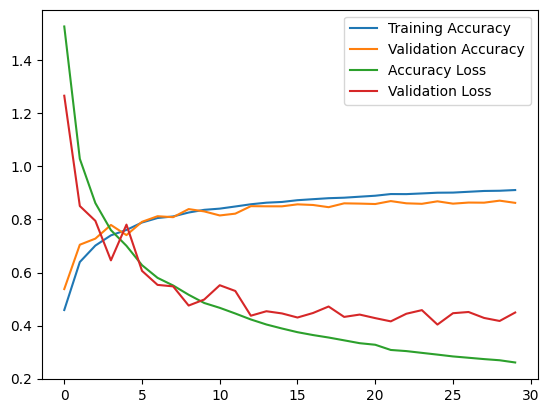

In [31]:
evaluation = modelv3.evaluate(x_test, y_test_cat)   #32 128
print('Test Accuracy: {}'.format(evaluation[1]))

tr_acc=historyv3.history['accuracy']
tr_loss = historyv3.history['loss']
val_acc= historyv3.history['val_accuracy']
val_loss = historyv3.history['val_loss']


#fig, ax = plt.subplot(figsize = (8,6))
plt.plot(tr_acc,label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(tr_loss, label='Accuracy Loss')
plt.plot(val_loss,label='Validation Loss')
plt.legend()

In [20]:
a=x_train.copy()

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


modelv3 = Sequential()

modelv3.add(Input(shape = x_train.shape[1:]))

modelv3.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(MaxPool2D(pool_size=(2, 2)))
modelv3.add(Dropout(0.2))

modelv3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(MaxPool2D(pool_size=(2, 2)))
modelv3.add(Dropout(0.3))

modelv3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization()) #adding normalization as a different from the modelv1
modelv3.add(MaxPool2D(pool_size=(2, 2))) #adding normalization as a different from the modelv1
modelv3.add(Dropout(0.4))


#Building Fully Connected Layer (FC Layer)
modelv3.add(Flatten())

modelv3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelv3.add(BatchNormalization())
modelv3.add(Dropout(0.4)) #it was 0.3

modelv3.add(Dense(10, activation='softmax'))

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         verbose=1,
                                         patience=10,
                                         restore_best_weights=True)

opt = keras.optimizers.Adam(learning_rate=0.001) # it was 0.003
modelv3.compile(loss='categorical_crossentropy', optimizer=opt , metrics=['accuracy'])


datagen =  ImageDataGenerator(
                rotation_range=20,
            	zoom_range=0.15,
        		width_shift_range=0.2,
        		height_shift_range=0.2,
        		shear_range=0.15,
        		horizontal_flip=True,
        		fill_mode="nearest")

# train
history_aug = modelv3.fit(datagen.flow(x_train, y_train_cat, batch_size=32), 
                            validation_data=(x_test, y_test_cat), 
                            epochs=100, verbose=1,callbacks= [callback])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.2849 - loss: 2.1216 - val_accuracy: 0.4404 - val_loss: 1.6643
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4672 - loss: 1.4718 - val_accuracy: 0.4866 - val_loss: 1.6233
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5471 - loss: 1.2658 - val_accuracy: 0.6180 - val_loss: 1.1057
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6045 - loss: 1.1320 - val_accuracy: 0.6401 - val_loss: 1.0865
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6373 - loss: 1.0407 - val_accuracy: 0.7144 - val_loss: 0.8488
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6698 - loss: 0.9629 - val_accuracy: 0.7493 - val_loss: 0.7335
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6864 - loss: 0.9159 - val_accuracy: 0.7443 - val_loss: 0.7362
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8671 - loss: 0.4007
Test Accuracy: 0.8650000095367432


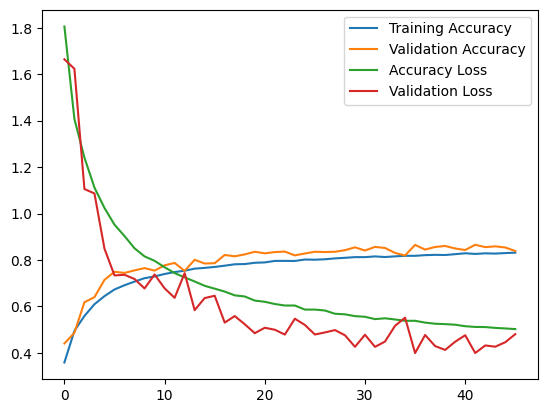

In [44]:
evaluation = modelv3.evaluate(x_test, y_test_cat)   #32 128
print('Test Accuracy: {}'.format(evaluation[1]))

tr_acc=history_aug.history['accuracy']
tr_loss = history_aug.history['loss']
val_acc= history_aug.history['val_accuracy']
val_loss = history_aug.history['val_loss']


#fig, ax = plt.subplot(figsize = (8,6))
plt.plot(tr_acc,label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(tr_loss, label='Accuracy Loss')
plt.plot(val_loss,label='Validation Loss')
plt.legend()

# First ResNet Study

In [6]:
from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
from datasets import load_dataset
from PIL import Image
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn as nn
import pickle
import os
import torch.nn.functional as F
import requests
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd
torch.manual_seed(1) # Set manual seed
from sklearn import preprocessing
from torch.utils.data import DataLoader, Dataset, Subset



image = Image.open('/kaggle/input/kalempic/kalem.jpg')
image = image.convert("RGB")

processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

inputs = processor(image, return_tensors="pt")


with torch.no_grad():
    logits = model(**inputs).logits

predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

ballpoint, ballpoint pen, ballpen, Biro


In [7]:
#this is the standart numbers for generic resnet applications

mean=[0.4914, 0.4822, 0.4465]
std=[0.2023, 0.1994, 0.2010]

In [8]:
import keras
#(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


## Packing images with label for plotting

In [9]:
'''
this classification is not suitable because torch.dataloader is suitable with ((image,label),(image_label))
not dictionary phase!
'''
def classification_with_label(data,label):
    mylabel = label.flatten()
    myclass=set(mylabel.flatten())
    mydict = {}

    for each_data, each_label in zip(data,mylabel):
        if each_label not in mydict:
            
            mydict[each_label] = []  # Initialize the list for this label
        mydict[each_label].append(each_data)
    
    return mydict

train_pack = classification_with_label(x_train,y_train)
test_pack = classification_with_label(x_test,y_test)

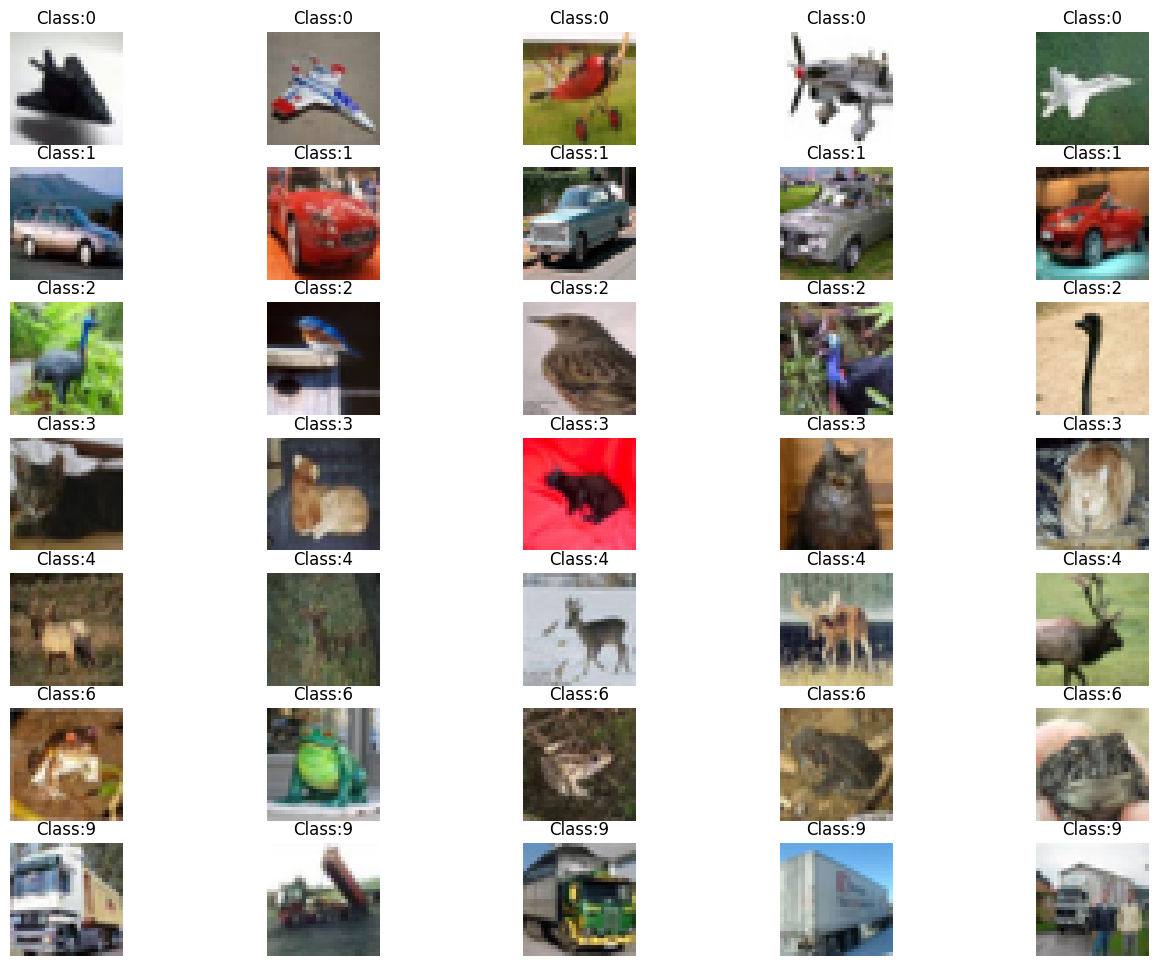

In [10]:
index = 0
labels = list(set(y_train.flatten()))
specific_label=[labels[0],labels[1],labels[2],labels[3],labels[4],labels[6],labels[9]]

fig, ax = plt.subplots(len(specific_label),5,figsize=(16,12))

for i in range(len(specific_label)):
    label = specific_label[index]
    for j in range(5):
        image = train_pack[label][j]
        ax[i, j].imshow(image, cmap='gray')
        ax[i,j].set_title('Class:'+str(label),fontsize = 12)
        ax[i, j].axis('off')  # Turn off the axis
            
    index +=1
    mytext = 'Images from:'+str(specific_label[i])
    

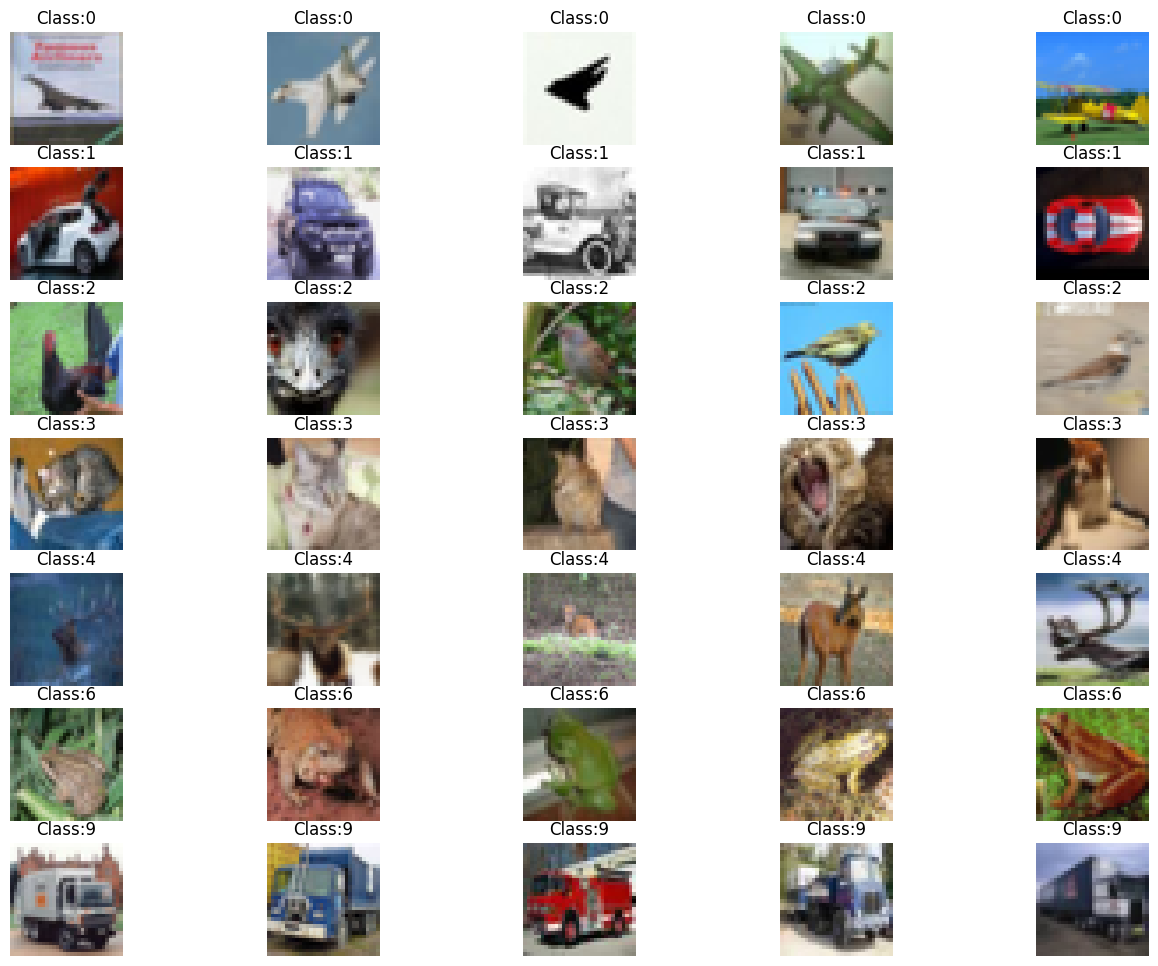

In [11]:
index = 0
labels = list(set(y_train.flatten()))
specific_label=[labels[0],labels[1],labels[2],labels[3],labels[4],labels[6],labels[9]]

fig, ax = plt.subplots(len(specific_label),5,figsize=(16,12))

for i in range(len(specific_label)):
    label = specific_label[index]
    for j in range(5):
        image = test_pack[label][j]
        ax[i, j].imshow(image, cmap='gray')
        ax[i,j].set_title('Class:'+str(label),fontsize = 12)
        ax[i, j].axis('off')  # Turn off the axis
            
    index +=1
    mytext = 'Images from:'+str(specific_label[i])
    

## Pipeline for compose of train and test 

In [12]:
mean = [0.4914, 0.4822, 0.4465]
std = [0.247, 0.243, 0.261]

In [13]:
from torchvision import transforms

# -------- INFO --------
#Training pipeline focuses on augmentation + normalization.
#Testing pipeline focuses on standard preprocessing + normalization.'
# -------- INFO --------

#train pipeline for compose
#COMPOSE OF TRAIN AND TEST
#This is a pipeline where input data are being processed here

train_compose = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(0.1),
    transforms.ColorJitter(brightness= 0.1,contrast= 0.1,saturation= 0.1),
    transforms.RandomAdjustSharpness(sharpness_factor= 2,p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean,std),
    transforms.RandomErasing(p = 0.75,
                             scale=(0.02,0.1),
                             value =1.0,
                             inplace=False)])

#no need to data augmentation in test so compose parameters are like this:
test_compose = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean,std),
])

## data_label and DataLoader 

In [14]:
#https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
from PIL import Image
from torch.utils.data import Dataset, DataLoader

class ClassificationWithLabelDataset(Dataset):
    def __init__(self, img_labels, images, transform=None, target_transform=None):
        """
        Args:
            img_labels: A list or array of labels for the images.
            images: A list or array of images (e.g., numpy arrays or file paths).
            transform: A function/transform to apply to the images.
            target_transform: A function/transform to apply to the labels.
        """
        self.img_labels = img_labels
        self.images = images
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)  # Number of samples in the dataset

    def __getitem__(self, idx):
        # Fetch the image and label for the given index
        image = self.images[idx]
        label = self.img_labels[idx]

        # Convert the image from NumPy to PIL format
        image = Image.fromarray(image)

        # Apply transformations if provided
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

# Assuming y_train and x_train are the labels and images respectively
train_data = ClassificationWithLabelDataset(y_train, x_train, transform=train_compose)
test_data = ClassificationWithLabelDataset(y_test, x_test, transform=test_compose)

In [15]:
import torch

print('number of CPU core',os.cpu_count())
print('optimum value in num of worker:',torch.get_num_threads())

number of CPU core 4
optimum value in num of worker: 2


In [16]:
# Create DataLoaders for batch processing

#Shuffle:
#True: Randomly shuffles the data at the beginning of every epoch. This is crucial for training models to avoid learning patterns from the order of the data. ---> Recommended for train
#False: Loads data in sequential order (useful for evaluation or debugging). ---> Recommended for test

#num_workers: Parallelizes data loading to speed up the process. Each worker loads a portion of the dataset in parallel.
#Adjust based on your hardware and the dataset size. Too many workers can cause overhead or out-of-memory errors.

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False, num_workers=2)


In [17]:
#1 batch packes 32 images with 32 labels!!!!!
for images, labels in train_dataloader:
    print(images.shape)  #expected to see only 32 images so [32,32,32,3] (32 times of 32x32 pixel in 3 channels)
    print(labels.shape)  #expected to see only 32 labels (32 times labels for each image)
    break #iterate for only one cycle

torch.Size([32, 3, 224, 224])
torch.Size([32, 1])


In calling the images with labels from the dataloader:

> with the help of : https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#iterate-through-the-dataloader
  

* train_features, train_labels = next(iter(train_loader))
* img = train_features[0].squeeze()
* label = train_labels[0]



torch.Size([32, 3, 224, 224])
torch.Size([32, 1])


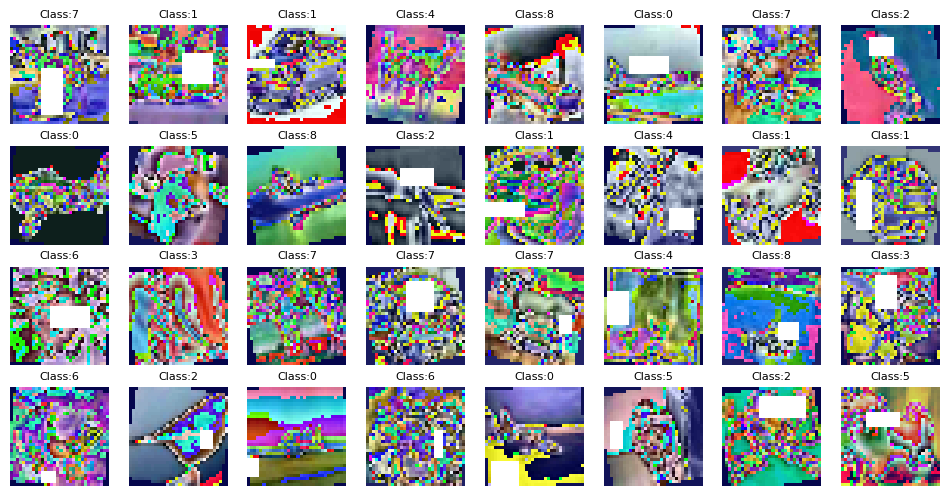

In [18]:
#each batch packes 32 images with 32 labels!!!!!
for images, labels in train_dataloader:
    first_batch = images
    first_batch_labels = labels

    print(images.shape)  #expected to see only 32 images so [32,32,32,3] (32 times of 32x32 pixel in 3 channels)
    print(labels.shape)  #expected to see only 32 labels (32 times labels for each image)
    break #iterate for only one cycle


fig, axes = plt.subplots(4,8,figsize=(12,6))

for idx, (img, label) in enumerate(zip(first_batch,first_batch_labels)):

  class_cifar = int(label)
  #print(img.shape) # torch.Size([3, 224, 224])
  image = img.permute(1,2,0) #now it is 224,224,3
  image = image.detach().cpu().numpy()
  image = (image * 255).astype('uint8')
  #Convert CHW to HWC for display
  
  image = cv2.resize(image,(32,32))
  
  ax = axes[idx//8][idx%8]
  ax.imshow(image)
  ax.set_title('Class:'+str(class_cifar),fontsize = 8)
  ax.axis('off')


## Define the model

In [51]:
#go with resnet18 pretrained model

import torch
import torchvision.models as models

import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler


#load resnet18
rmodel = models.resnet18(pretrained = True)

print(rmodel)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [52]:
#lets customize the FC layer:

rmodel.fc = nn.Linear(rmodel.fc.in_features,out_features = 10) #because the FC must give 10 different classes
print(rmodel)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [53]:
#--------------- INFO ---------------
# The weights, parameters are very valuable that comes from pretrained model. so  first of all, i need to preserve them in training
# The trainable parameters should come from FC layer, not CONV.
#--------------- INFO ---------------


#here the layer list,
for name, param in rmodel.named_parameters():
    print(f"Layer: {name}")
    print(f" - Shape: {param.shape}")
    print(f" - Requires Grad: {param.requires_grad}")
    print()

Layer: conv1.weight
 - Shape: torch.Size([64, 3, 7, 7])
 - Requires Grad: True

Layer: bn1.weight
 - Shape: torch.Size([64])
 - Requires Grad: True

Layer: bn1.bias
 - Shape: torch.Size([64])
 - Requires Grad: True

Layer: layer1.0.conv1.weight
 - Shape: torch.Size([64, 64, 3, 3])
 - Requires Grad: True

Layer: layer1.0.bn1.weight
 - Shape: torch.Size([64])
 - Requires Grad: True

Layer: layer1.0.bn1.bias
 - Shape: torch.Size([64])
 - Requires Grad: True

Layer: layer1.0.conv2.weight
 - Shape: torch.Size([64, 64, 3, 3])
 - Requires Grad: True

Layer: layer1.0.bn2.weight
 - Shape: torch.Size([64])
 - Requires Grad: True

Layer: layer1.0.bn2.bias
 - Shape: torch.Size([64])
 - Requires Grad: True

Layer: layer1.1.conv1.weight
 - Shape: torch.Size([64, 64, 3, 3])
 - Requires Grad: True

Layer: layer1.1.bn1.weight
 - Shape: torch.Size([64])
 - Requires Grad: True

Layer: layer1.1.bn1.bias
 - Shape: torch.Size([64])
 - Requires Grad: True

Layer: layer1.1.conv2.weight
 - Shape: torch.Size([6

In [54]:
#Enhence the FC LAYER

import torch.nn as nn

# Replace the FC layer
rmodel.fc = nn.Sequential(
    nn.Linear(512, 128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Dropout(0.5),  # Optional: Helps prevent overfitting
    nn.Linear(128, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.3),  # Optional: Helps prevent overfitting
    nn.Linear(64, 10)
)

print(rmodel)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [55]:
for name,param in rmodel.named_parameters():
  if 'fc' not in name:
    param.requires_grad = False  #False makes itself frozen
  else:
    param.requires_grad = True


#lets show up the latest status of rmodel:
for name, param in rmodel.named_parameters():
  print(f'Layer: {name}')
  print(f' - Shape: {param.shape}')
  print(f' - Requires Grad: {param.requires_grad}')

Layer: conv1.weight
 - Shape: torch.Size([64, 3, 7, 7])
 - Requires Grad: False
Layer: bn1.weight
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: bn1.bias
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.0.conv1.weight
 - Shape: torch.Size([64, 64, 3, 3])
 - Requires Grad: False
Layer: layer1.0.bn1.weight
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.0.bn1.bias
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.0.conv2.weight
 - Shape: torch.Size([64, 64, 3, 3])
 - Requires Grad: False
Layer: layer1.0.bn2.weight
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.0.bn2.bias
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.1.conv1.weight
 - Shape: torch.Size([64, 64, 3, 3])
 - Requires Grad: False
Layer: layer1.1.bn1.weight
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.1.bn1.bias
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.1.conv2.weight
 - Shape: torch.Size([6

In [56]:
#Hybrid model
#WHAT IF UNFREEZE ONLY THE LAST LAYER OF CONV 
for name,param in rmodel.named_parameters():
  if 'layer4' in name:
    param.requires_grad = True

In [57]:
#lets show up the latest status of rmodel:
for name, param in rmodel.named_parameters():
  print(f'Layer: {name}')
  print(f' - Shape: {param.shape}')
  print(f' - Requires Grad: {param.requires_grad}')

Layer: conv1.weight
 - Shape: torch.Size([64, 3, 7, 7])
 - Requires Grad: False
Layer: bn1.weight
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: bn1.bias
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.0.conv1.weight
 - Shape: torch.Size([64, 64, 3, 3])
 - Requires Grad: False
Layer: layer1.0.bn1.weight
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.0.bn1.bias
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.0.conv2.weight
 - Shape: torch.Size([64, 64, 3, 3])
 - Requires Grad: False
Layer: layer1.0.bn2.weight
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.0.bn2.bias
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.1.conv1.weight
 - Shape: torch.Size([64, 64, 3, 3])
 - Requires Grad: False
Layer: layer1.1.bn1.weight
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.1.bn1.bias
 - Shape: torch.Size([64])
 - Requires Grad: False
Layer: layer1.1.conv2.weight
 - Shape: torch.Size([6

In [58]:
#set the seeds

torch.manual_seed(42)
torch.cuda.manual_seed(42)


#define the device

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rmodel = rmodel.to(device)

if torch.cuda.is_available():
  print('GPU is available')
  print('GPU name:',torch.cuda.get_device_name(0))
else:
  print('GPU is not available')


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rmodel.parameters(),lr = 0.001)

#early stop setup
patience = 5
best_loss = float('inf') #set it as infinite value
epochs_no_improve = 0    #counts if it is no improvements
early_stop = False       #trigger


#for overall performance graph
history_train_acc = []
history_train_loss = []
history_val_acc = []
history_val_loss = []


num_epoch = 30

for epoch in range(num_epoch):
    #Initiate the parameters
    correct = 0 #calculation param
    total = 0   #calculation param
    train_acc = 0.0         #Train Acc Score for each epoch
    train_loss = 0.0        #Train Loss Score for each epoch
    test_acc = 0.0          #Test Acc Score for each epoch
    test_loss = 0.0         #Test Loss Score for each epoch
    running_loss = 0.0      #calculation parameter for train
    running_test_loss = 0.0 #calculation parameter for test

    rmodel.train() #Set the model as training mode
   

  #------------------ Train the Model ------------------
    for inputs,labels in train_dataloader:
    
        #inputs = inputs.permute(0, 3, 1, 2).to(torch.float).to(device)
        inputs = inputs.to(torch.float).to(device)
        #if the label is torch[32,1] then need to squeeze 
        labels = labels.squeeze().to(device)

         # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
   
        outputs = rmodel(inputs)
        # Compute loss
        loss = criterion(outputs,labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _,predicted = torch.max(outputs,1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = round((correct/total),3)
    train_loss = round((running_loss / len(train_dataloader)),3)  
  

      # ------------------ Evaluate the Model ------------------
    rmodel.eval()  # Set model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs = inputs.to(torch.float).to(device)
            #before squeeze label is torch.size([32,1])
            #after squeeze label turn to be [32] 
            labels = labels.squeeze().to(device) 
            outputs = rmodel(inputs)

            # Compute loss
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()  # Accumulate loss
        
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
      
    #Calculate test accuracy
    test_acc = round((correct / total),3)  
    # Calculate average test loss
    test_loss = round(running_test_loss / len(test_dataloader),3)
        
    history_train_acc.append(train_acc)
    history_train_loss.append(train_loss)
    history_val_acc.append(test_acc)
    history_val_loss.append(test_loss)

    #Printing the results  
    print(f"Epoch [{epoch + 1}/{num_epoch}],"
          f"Train Acc: {train_acc},"
          f"Train Loss: {train_loss}," 
          f"Test Acc: {test_acc},"
          f"Test Loss: {test_loss}")

    
    #if the improvement exists:
    if test_loss < best_loss:
        best_loss = test_loss
        epochs_no_improve = 0 #improvement is still valid so set it as zero
    else:
        epochs_no_improve +=1 #counts if no improvement

    print(f"Early Stop Counter: {epochs_no_improve}/{patience}")

    if epochs_no_improve >= patience: #stopping the training because overfitting just started-
        print('early stop triggered!')
        early_stop = True # set the trigger True
        break

if early_stop: #if TRUE (early stop)
    print('Halted training the model due to lack of improvement')
else:
    print('Completed all epoches w/o early stop!')


GPU is available
GPU name: Tesla P100-PCIE-16GB
Epoch [1/30],Train Acc: 0.733,Train Loss: 0.85,Test Acc: 0.87,Test Loss: 0.4
Early Stop Counter: 0/5
Epoch [2/30],Train Acc: 0.819,Train Loss: 0.579,Test Acc: 0.893,Test Loss: 0.316
Early Stop Counter: 0/5
Epoch [3/30],Train Acc: 0.845,Train Loss: 0.497,Test Acc: 0.901,Test Loss: 0.295
Early Stop Counter: 0/5
Epoch [4/30],Train Acc: 0.862,Train Loss: 0.438,Test Acc: 0.895,Test Loss: 0.307
Early Stop Counter: 1/5
Epoch [5/30],Train Acc: 0.877,Train Loss: 0.391,Test Acc: 0.913,Test Loss: 0.262
Early Stop Counter: 0/5
Epoch [6/30],Train Acc: 0.888,Train Loss: 0.357,Test Acc: 0.919,Test Loss: 0.245
Early Stop Counter: 0/5
Epoch [7/30],Train Acc: 0.896,Train Loss: 0.333,Test Acc: 0.92,Test Loss: 0.239
Early Stop Counter: 0/5
Epoch [8/30],Train Acc: 0.907,Train Loss: 0.299,Test Acc: 0.921,Test Loss: 0.248
Early Stop Counter: 1/5
Epoch [9/30],Train Acc: 0.91,Train Loss: 0.283,Test Acc: 0.923,Test Loss: 0.239
Early Stop Counter: 2/5
Epoch [10/30]

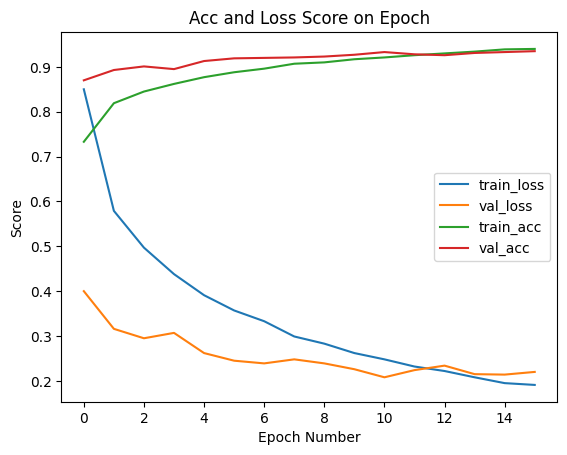

In [59]:
x = []
for e in range(len(history_train_loss)):
    x.append(e)

plt.plot(x,history_train_loss,label = 'train_loss')
plt.plot(x,history_val_loss,label = 'val_loss')
plt.plot(x,history_train_acc,label = 'train_acc')
plt.plot(x,history_val_acc,label = 'val_acc')


plt.xlabel('Epoch Number')
plt.ylabel('Score')
plt.title('Acc and Loss Score on Epoch')
plt.legend()
plt.show()


In [60]:
pip install py7zr

Note: you may need to restart the kernel to use updated packages.


In [61]:
testdata = '/kaggle/input/cifar-10/test.7z'
mydir = '/kaggle/working/' 

import py7zr

archive = py7zr.SevenZipFile(testdata, mode='r')
archive.extractall(path=mydir)
archive.close()

test_list = []
test_path = '/kaggle/working/test/'

for each in os.listdir(test_path):

    test_list.append(os.path.join(test_path,each))

In [62]:
len(test_list)

300000

In [63]:
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust size as needed
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

# Set model to evaluation mode
rmodel.eval()

# Initialize lists to store results
picnames = []
predictions = []
stopper = 0 

# Iterate over test images
with torch.no_grad():
    for file_name in test_list:
        
        # Load and preprocess the image
        image = Image.open(file_name).convert('RGB') #here, it is 3x32x32
        image = test_transform(image).unsqueeze(0).to(device)  # Add batch dimension --- now 1x3x32x32 (having batch size is important in pytorch but no need to have same batch number in test and train!!!!)
        
        # Predict
        outputs = rmodel(image)
        _, predicted = torch.max(outputs, 1)

        # Store the results
        file_name = os.path.basename(file_name)  # '1.png'
        file_name = os.path.splitext(file_name)[0]  # '1'
        
        picnames.append(file_name)
        predictions.append(predicted.item())


# Save to CSV (optional)
import pandas as pd
df = pd.DataFrame({'id': picnames, 'label': predictions})
df.to_csv('/kaggle/working/test_prediction.csv', index=False)
print("Predictions saved to test_prediction.csv")

Predictions saved to test_prediction.csv


In [64]:
len(predictions)

300000

In [66]:
class_object= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_object = [0,1,2,3,4,5,6,7,8,9]
num_to_class = dict(zip(num_object, class_object))
# Convert to class names
class_predictions = [num_to_class[num] for num in predictions]
print(len(class_predictions))

300000


In [67]:
# Save to CSV (optional)
import pandas as pd
df = pd.DataFrame({'id': picnames, 'label': class_predictions})
df.to_csv('/kaggle/working/test_prediction_obj.csv', index=False)
print("Predictions saved to test_prediction_obj.csv")

Predictions saved to test_prediction_obj.csv


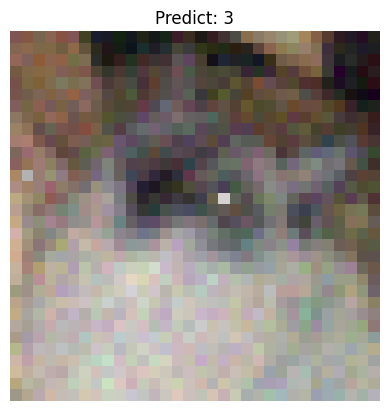

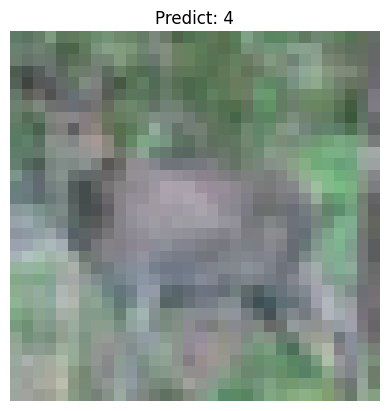

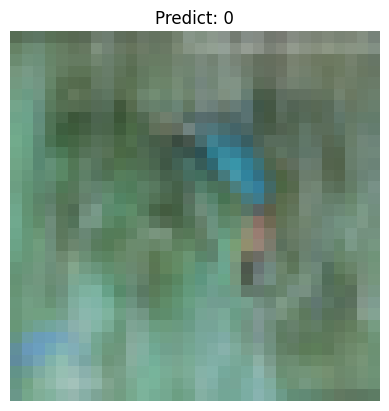

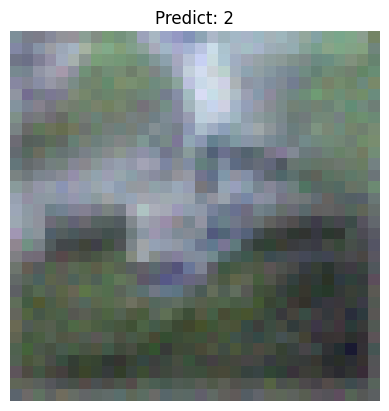

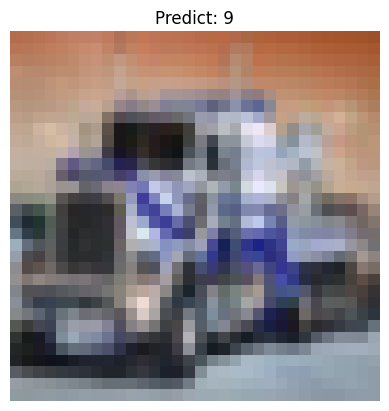

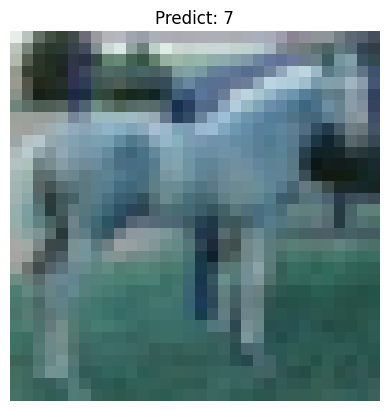

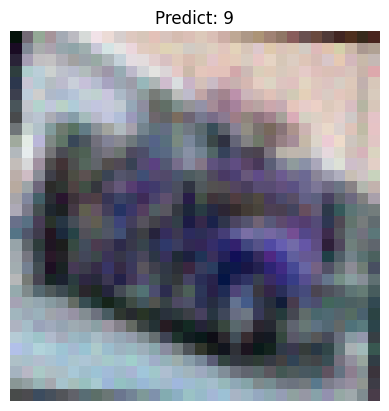

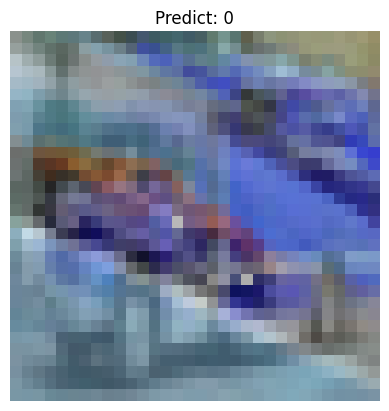

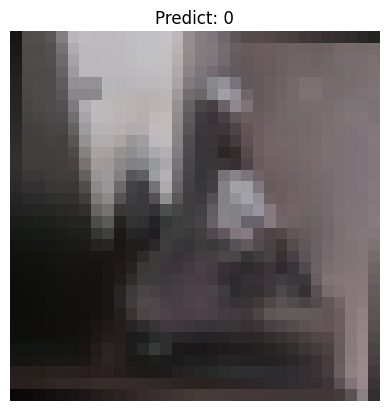

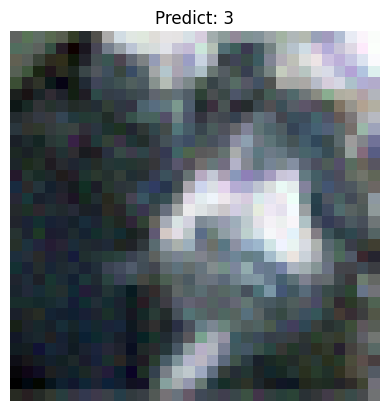

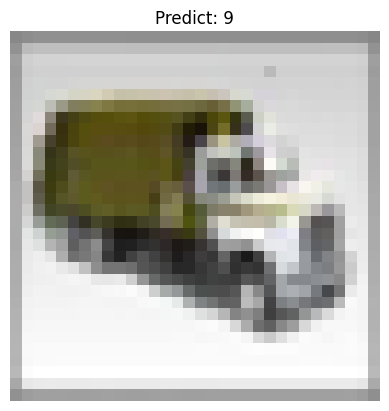

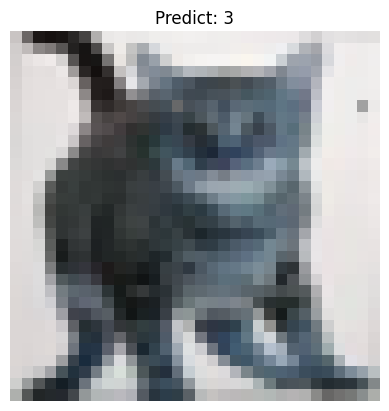

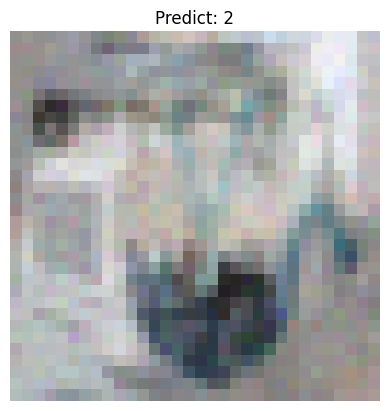

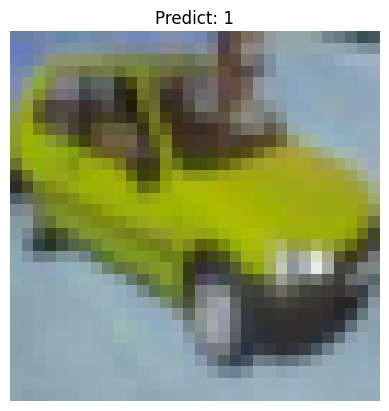

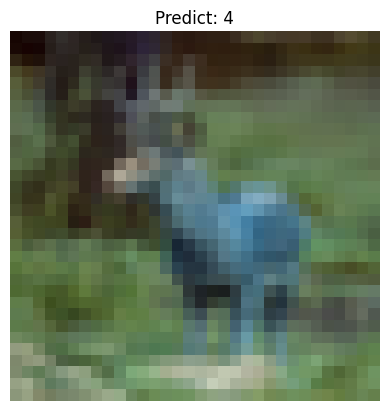

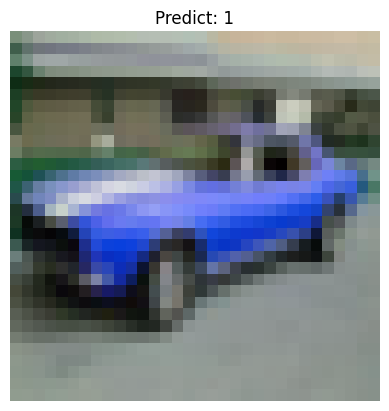

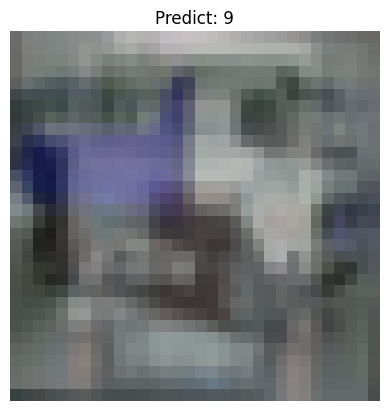

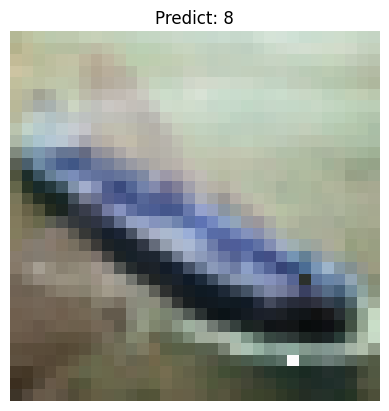

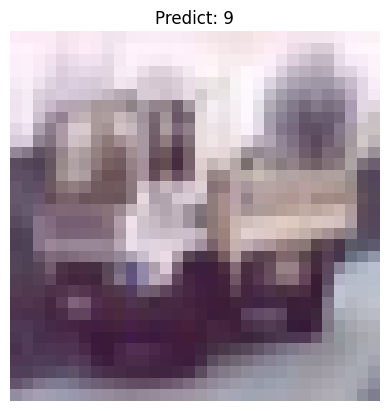

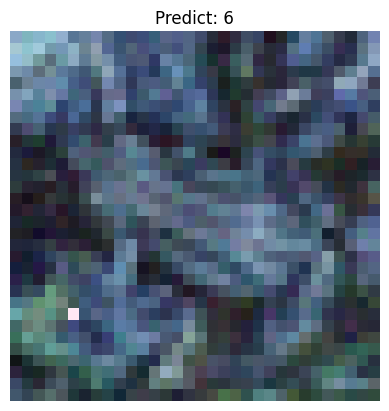

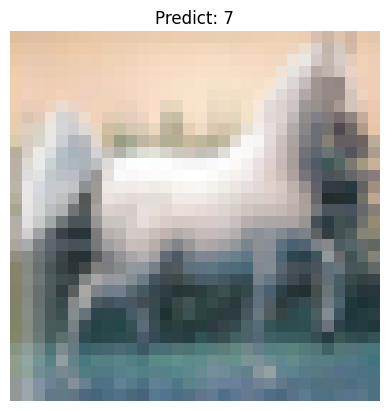

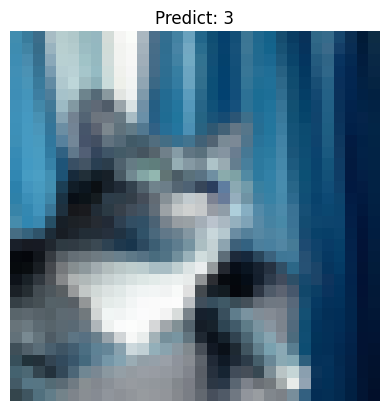

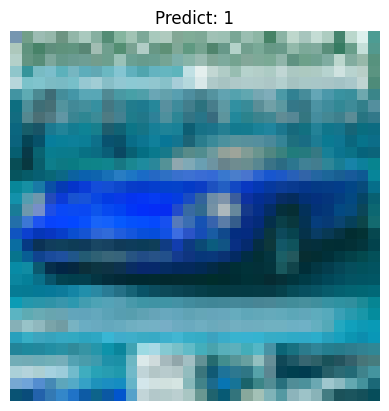

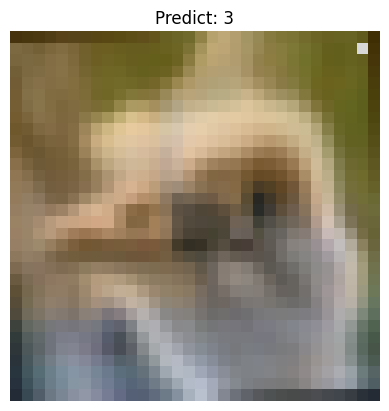

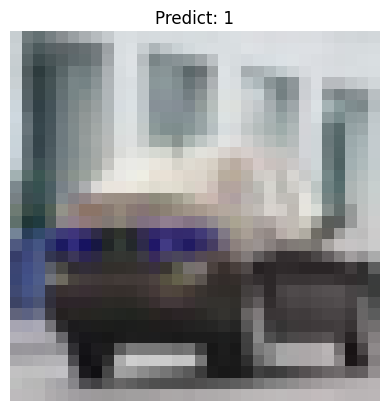

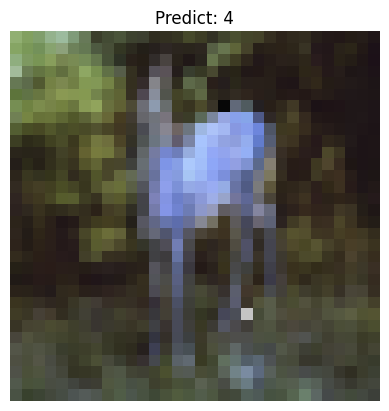

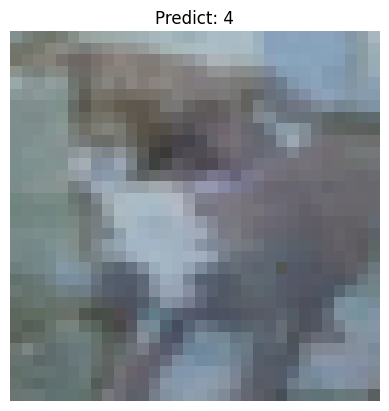

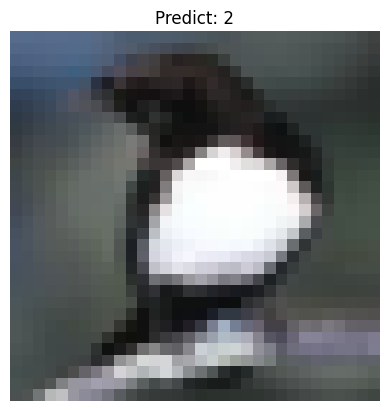

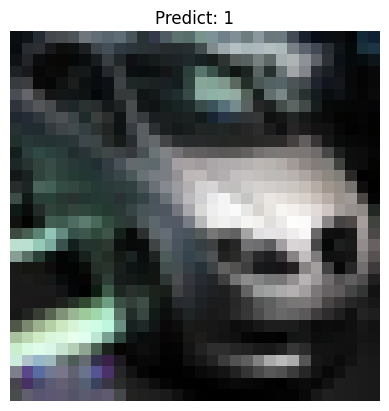

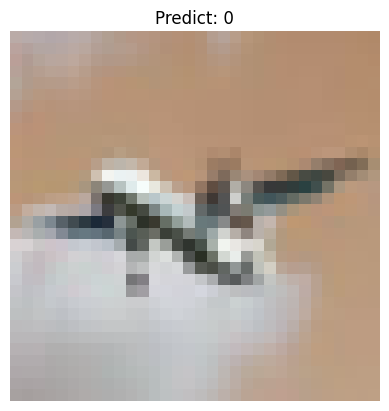

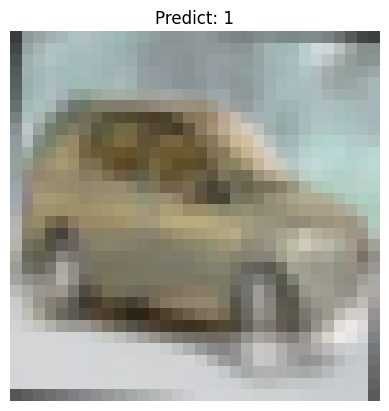

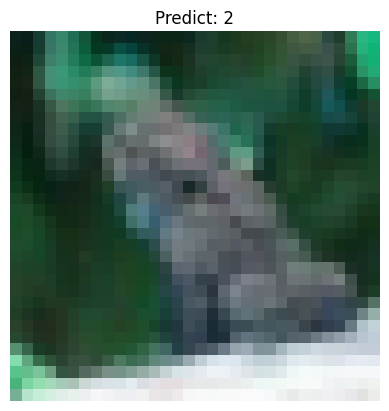

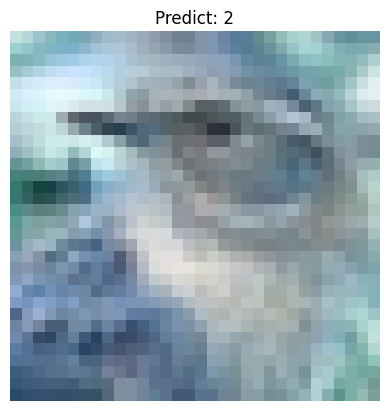

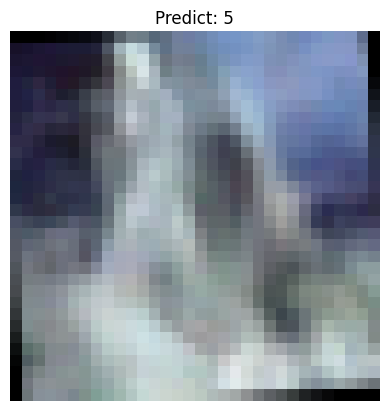

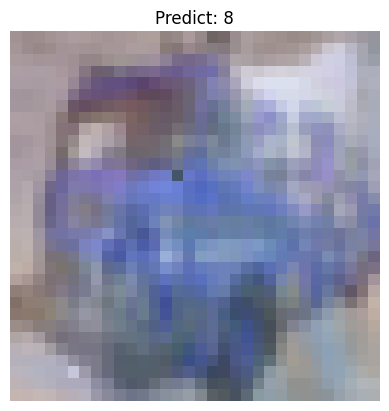

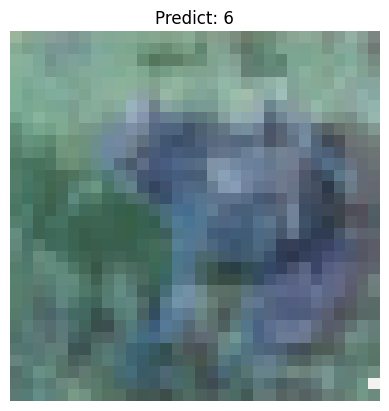

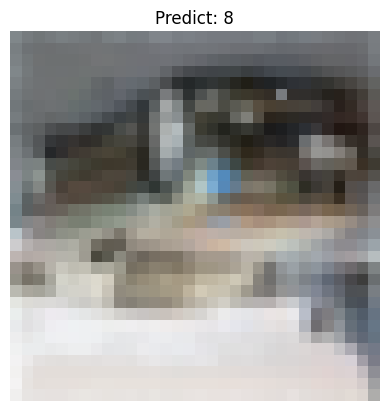

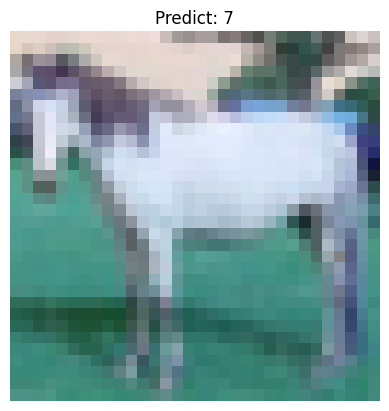

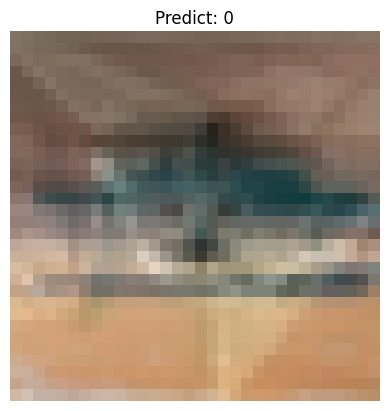

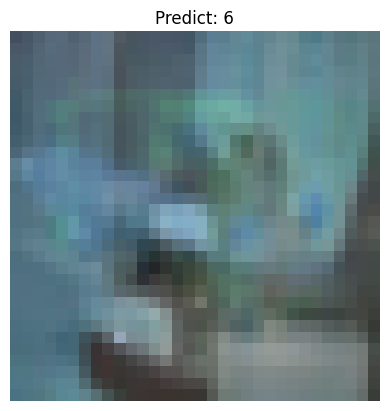

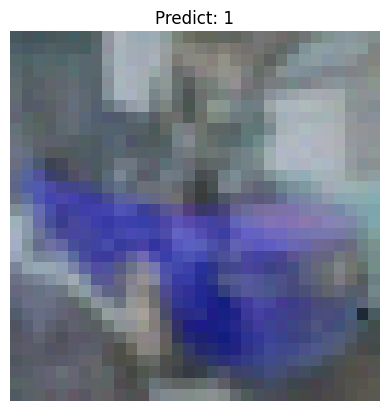

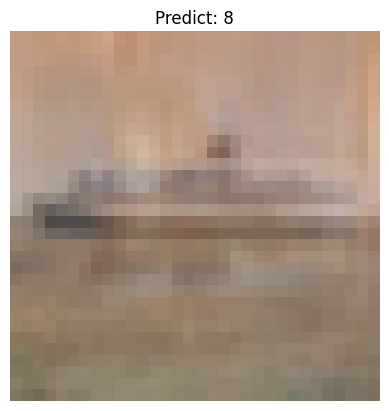

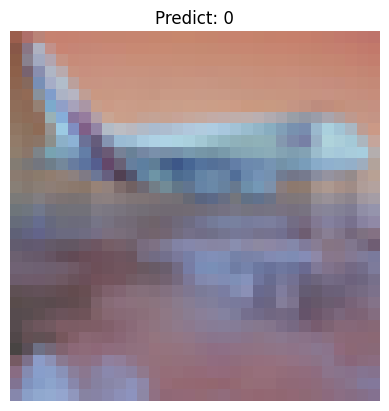

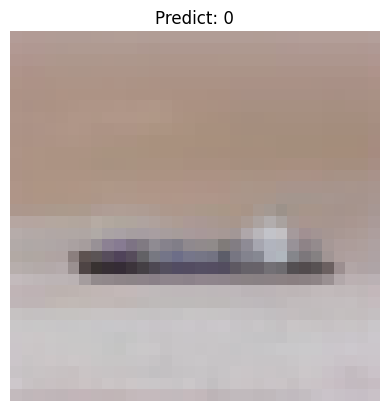

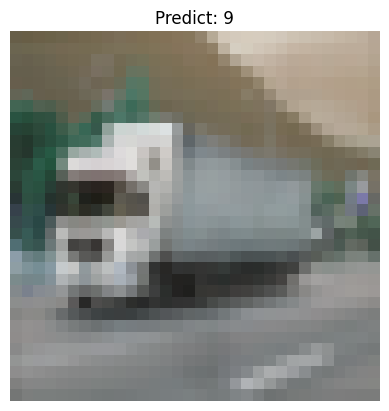

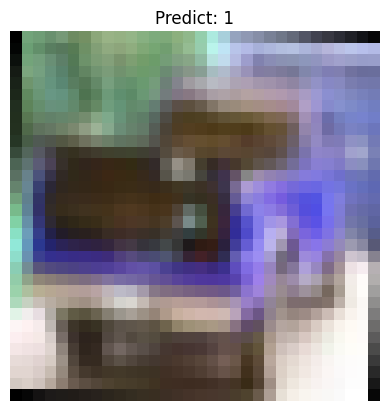

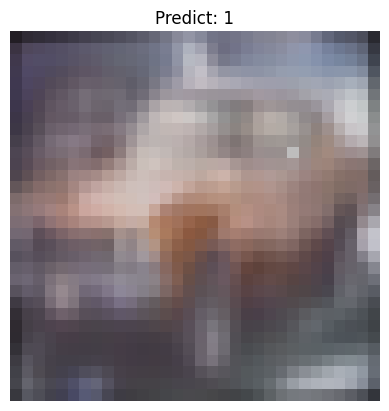

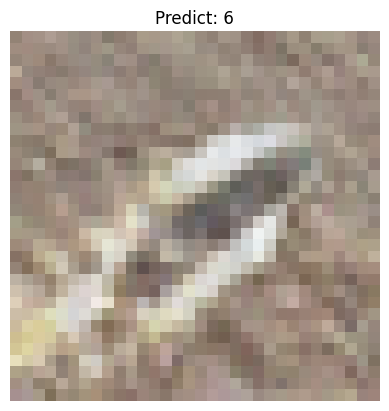

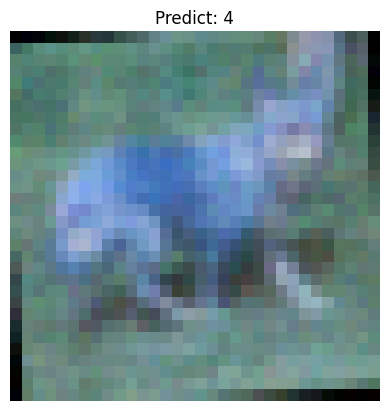

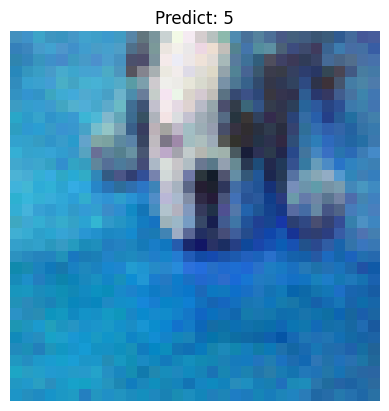

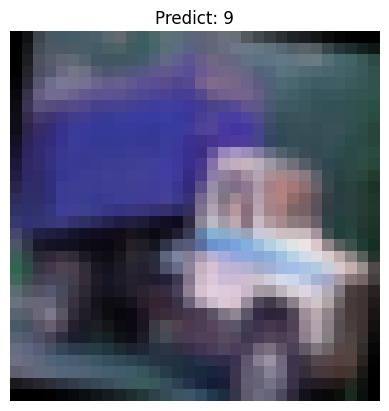

Predictions saved to test_predictions.csv


In [51]:
'''
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust size as needed
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

# Set model to evaluation mode
rmodel.eval()

# Initialize lists to store results
picnames = []
predictions = []
stopper = 0 

# Iterate over test images
with torch.no_grad():
    for file_name in test_list:
        
        # Load and preprocess the image
        image = Image.open(file_name).convert('RGB') #here, it is 3x32x32
        image_np = np.array(image)  # Shape: (32, 32, 3)
        image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
        image_np = cv2.resize(image_np,(32,32))
                
        image = test_transform(image).unsqueeze(0).to(device)  # Add batch dimension --- now 1x3x32x32 (having batch size is important in pytorch but no need to have same batch number in test and train!!!!)
        
        # Predict
        outputs = rmodel(image)
        _, predicted = torch.max(outputs, 1)

              # Display the image with matplotlib
        plt.imshow(image_np)  # Show the current image
        plt.title(f"Predict: {predicted.item()}")  # Optional: Add title with file name
        plt.axis('off')  # Optional: Turn off axis
        plt.show()  # Display the image before the next iteration
        
        # Store the results
        file_name = os.path.basename(file_name)  # '1.png'
        file_name = os.path.splitext(file_name)[0]  # '1'
        
        picnames.append(file_name)
        predictions.append(predicted.item())
        if stopper  == 50:
            break
        stopper += 1


# Save to CSV (optional)
import pandas as pd
df = pd.DataFrame({'id': picnames, 'label': predictions})
df.to_csv('/kaggle/working/test_predictions.csv', index=False)
print("Predictions saved to test_predictions.csv")
'''